# Main

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

ds = pd.read_csv("./perfect_datasets/perfect_dataset_v3.csv")
ds_overview = pd.read_csv("./perfect_datasets/perfect_dataset_v1.csv")

cv = CountVectorizer(max_features=1000, stop_words="english")

vectors = cv.fit_transform(ds["tags"]).toarray()
c=0
similarity = cosine_similarity(vectors)

suggg = []
sug_d={"name":[]}
for i in similarity:
    a = sorted(list(enumerate(similarity[c])), reverse=True, key=lambda x: x[1])
    c2=0
    temp = []
    temp_c = {"name": f"{ds.iloc[a[0][0]].title}"}

    for j in range(1, 25):
        temp_c["name"] += f",{ds.iloc[a[j][0]].title}"

    suggg.append(temp)
    sug_d["name"].append(temp_c["name"])
    c+=1

# ------------------------------

d_ds = pd.DataFrame(sug_d)
d_ds.to_csv("./perfect_datasets/perfect_datasets_v4.csv", index=False)


### K-means

In [14]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

ds = pd.read_csv("./perfect_datasets/perfect_dataset_v3.csv")
ds_overview = pd.read_csv("./perfect_datasets/perfect_dataset_v1.csv")

cv = CountVectorizer(max_features=1000, stop_words="english")

vectors = cv.fit_transform(ds["tags"]).toarray()

similarity = cosine_similarity(vectors)

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(similarity)

ds["cluster_label"] = cluster_labels

# ds.to_csv("./perfect_datasets/perfect_datasets_v4_with_clusters.csv", index=False)

c:\Users\mihir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0       4
15      4
24      4
33      4
44      4
       ..
4463    4
4467    4
4482    4
4494    4
4501    4
Name: cluster_label, Length: 785, dtype: int32

## Plot

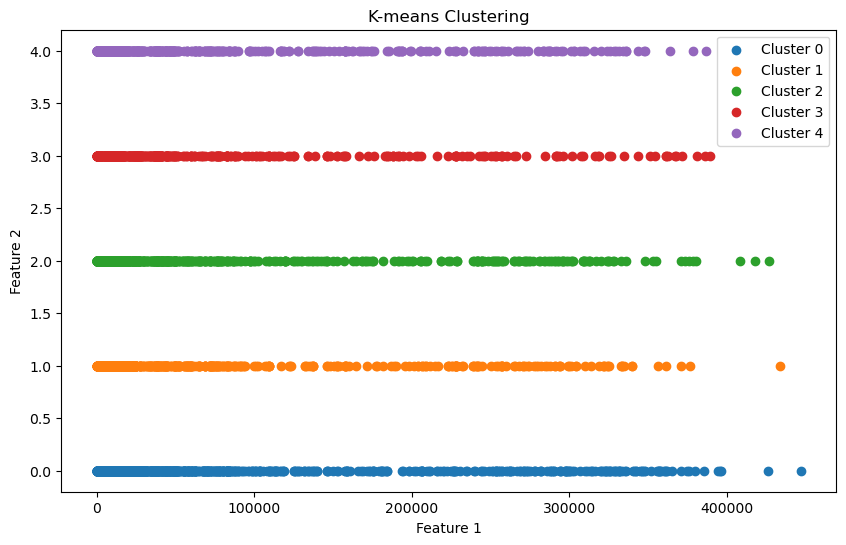

In [2]:
import matplotlib.pyplot as plt

c_ds = pd.read_csv("./perfect_datasets/perfect_datasets_v4_with_clusters.csv")

plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_data = ds[ds["cluster_label"] == i]
    plt.scatter(cluster_data["movie_id"], cluster_data["cluster_label"], label=f'Cluster {i}')
    # print(cluster_data)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
# c_ds[c_ds["cluster_label"]==1]
# c_ds[c_ds["title"].str.startswith("Batman")]